In [163]:
from fears.population import Population
from fears.experiment import Experiment
import numpy as np
import matplotlib.pyplot as plt
import pickle
from fears.utils import stats, plotter, pharm
import scipy.stats as spstats
import os

np.random.seed(2024)

init_counts = np.zeros(16)
init_counts[0] = 10**5

options = {
    'mut_rate':10**-9,
    'fitness_data':'from_file',
    'use_carrying_cap':True,
    'carrying_cap':10**8,
    'dwell':True,
    'dwell_time':24*3,
    'death_model':'pharmacodynamic',
    'n_timestep':350,
    'plot':False,
    'k_abs':4.61,
    'k_elim':0.63,
    'max_dose':40,
    'regimen_length':10*24,
    'dose_schedule':8,
    'curve_type':'pulsed',
    'n_sims':1
}

p = Population(**options)

In [164]:
cmax = np.linspace(30,52,5)
# cmax = np.linspace(2,100,3)
kelim = np.linspace(-np.log2(0.5)/2,-np.log2(0.5)/0.5,5)

res = np.zeros((len(cmax),len(kelim)))

for i,c in enumerate(cmax):
    for j,k in enumerate(kelim):

        p.reset_drug_conc_curve(max_dose=c,k_elim=k,plot=False)
        p.drug_curve = c*(p.drug_curve/np.max(p.drug_curve))
        
        for n in range(100):
            
            counts,et = p.simulate()

            if np.sum(counts,axis=1)[-1] <= 1:
                res[i,j] += 1
    



In [194]:
trough = []
for c in cmax:
    for k in [1.62,2]:
        p.reset_drug_conc_curve(max_dose=c,k_elim=k,plot=False)
        dc = p.drug_curve[100:150]
        trough.append(np.min(dc))

mean_trough_failed = np.mean(trough)
print(mean_trough_failed)

trough = []
for c in cmax:
    for k in [0.5,0.88,1.25]:
        p.reset_drug_conc_curve(max_dose=c,k_elim=k,plot=False)
        dc = p.drug_curve[100:150]
        trough.append(np.min(dc))

mean_trough_success = np.mean(trough)
print(mean_trough_success)

0.00013876848994862797
0.39802023548699983


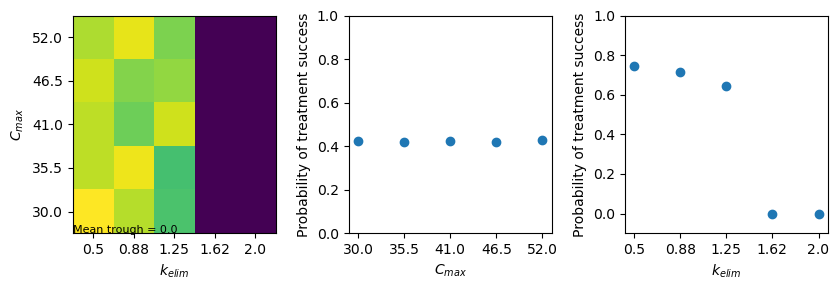

In [195]:
fig,ax_list = plt.subplots(ncols=3,figsize=(8.5,3))

ax = ax_list[0]

ax.imshow(res,origin='lower',aspect='auto')

ax.set_xticks(np.arange(5))
ax.set_xticklabels(np.round(kelim,2))

ax.set_yticks(np.arange(5))
ax.set_yticklabels(np.round(cmax,2))

ax.set_ylabel('$C_{max}$')
ax.set_xlabel('$k_{elim}$')

ax.annotate('Mean trough = .{}' ,(0,0),
            xytext=(0,0),xycoords='axes fraction',fontsize=12)

ax = ax_list[1]
x = np.arange(5)

ax.scatter(x,np.mean(res,axis=1)/100)

ax.set_ylim(0,1)

ax.set_ylabel('Probability of treatment success')

ax.set_xticks(np.arange(5))
ax.set_xticklabels(np.round(cmax,2))

ax.set_xlabel('$C_{max}$')

ax = ax_list[2]

ax.scatter(x,np.mean(res,axis=0)/100)

ax.set_ylabel('Probability of treatment success')

ax.set_xticks(np.arange(5))
ax.set_xticklabels(np.round(kelim,2))

ax.set_xlabel('$k_{elim}$')

ax.set_ylim(-0.1,1)

fig.tight_layout()

In [174]:
res

array([[81., 72., 58.,  0.,  0.],
       [73., 79., 57.,  0.,  0.],
       [73., 63., 75.,  0.,  0.],
       [75., 66., 68.,  0.,  0.],
       [71., 78., 65.,  0.,  0.]])

In [166]:
p.reset_drug_conc_curve(k_elim=1,plot=True)
print(np.sum(p.drug_curve))

p.reset_drug_conc_curve(k_elim=2,plot=True)

print(np.sum(p.drug_curve))

1739.8346022449114
765.2969348733334


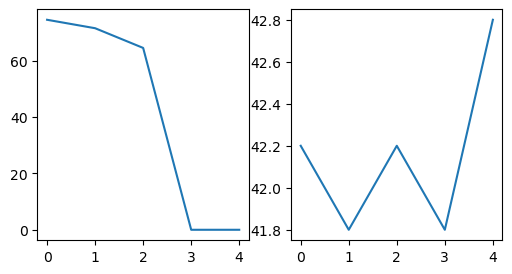

In [167]:
fig,ax = plt.subplots(ncols=2,figsize=(6,3))

ax[0].plot(np.mean(res,axis=0))
ax[1].plot(np.mean(res,axis=1))

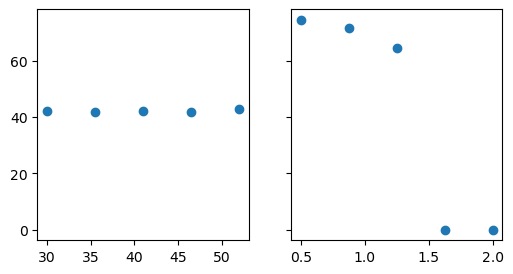

In [168]:
fig,ax = plt.subplots(ncols=2,figsize=(6,3),sharey=True)

# ax.imshow(res,extent=[kelim[-1],kelim[0],cmax[-1],cmax[0]],aspect='auto')
ax[0].scatter(cmax,np.mean(res,axis=1),label='cmax') 
ax[1].scatter(kelim,np.mean(res,axis=0),label='kelim')
# ax.errorbar(np.arange(5),np.mean(res,axis=1),yerr=np.std(res,axis=1),label='cmax')
# ax.errorbar(np.arange(5),np.mean(res,axis=0),yerr=np.std(res,axis=0),label='kelim')

In [169]:
np.mean(res,axis=0)

array([74.6, 71.6, 64.6,  0. ,  0. ])

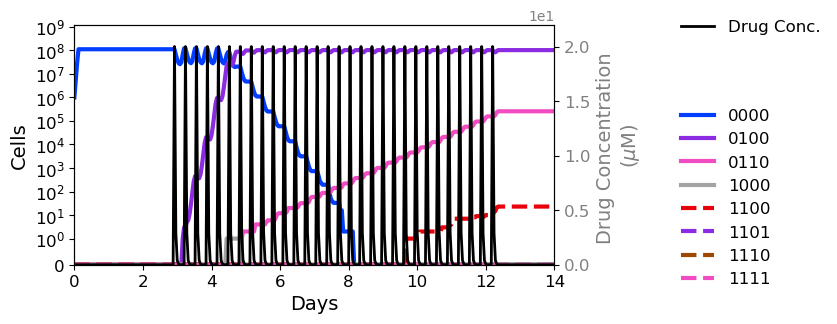

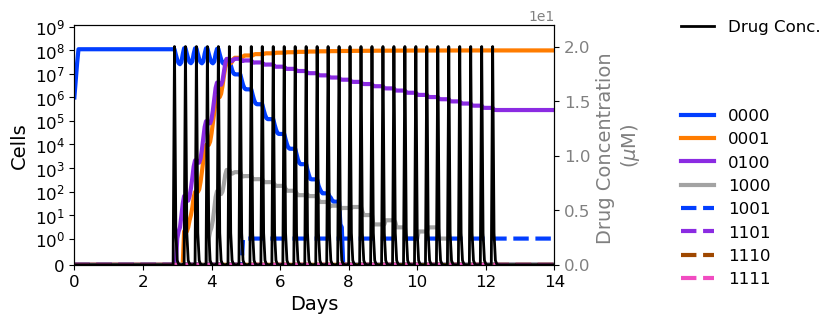

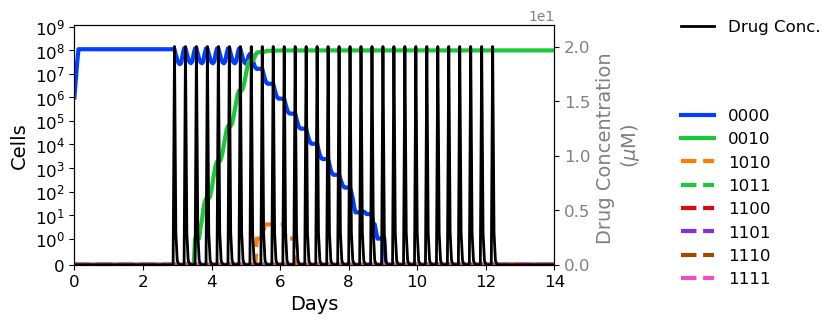

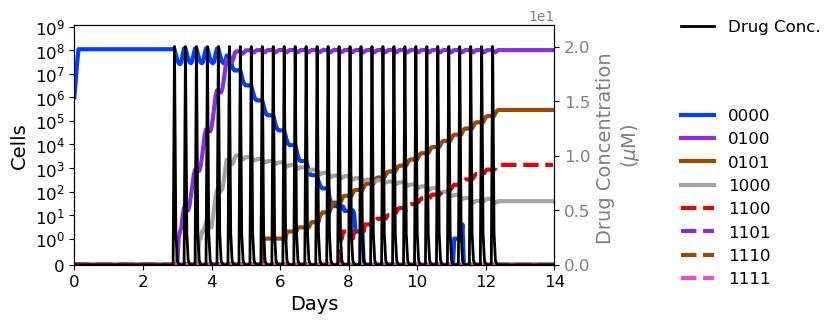

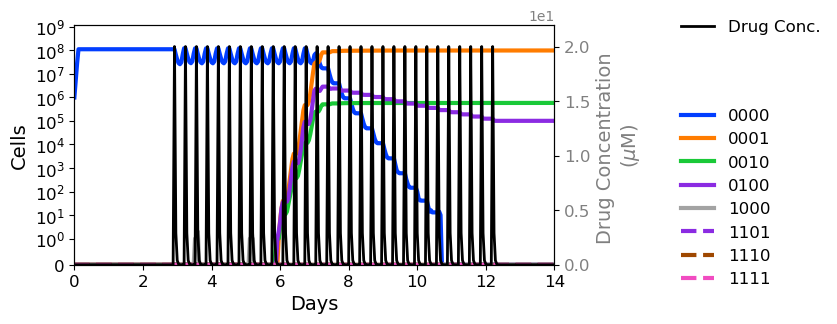

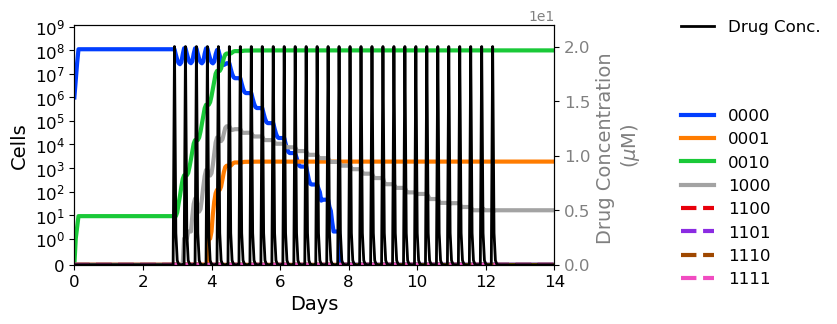

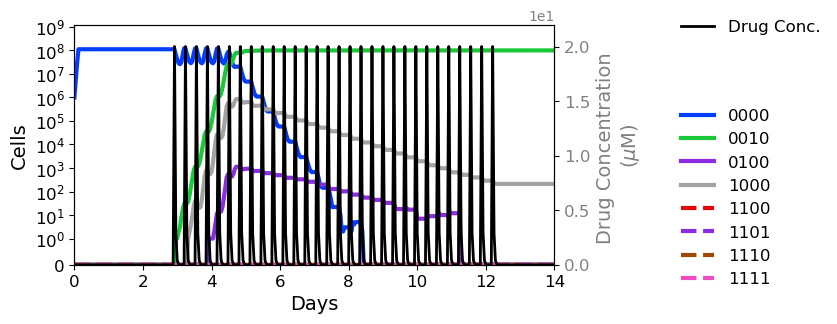

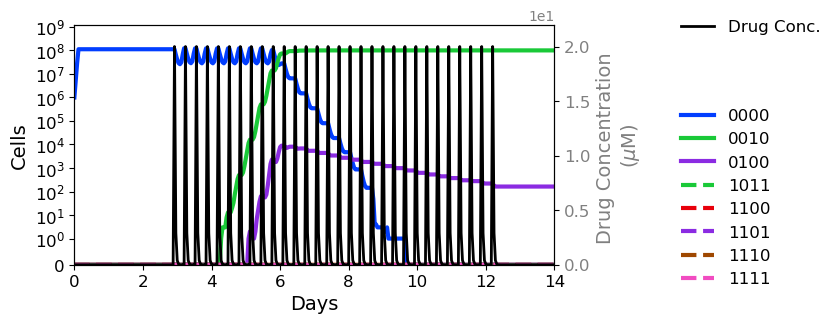

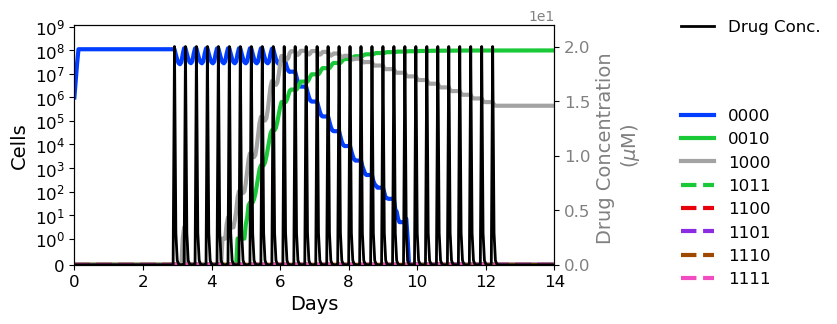

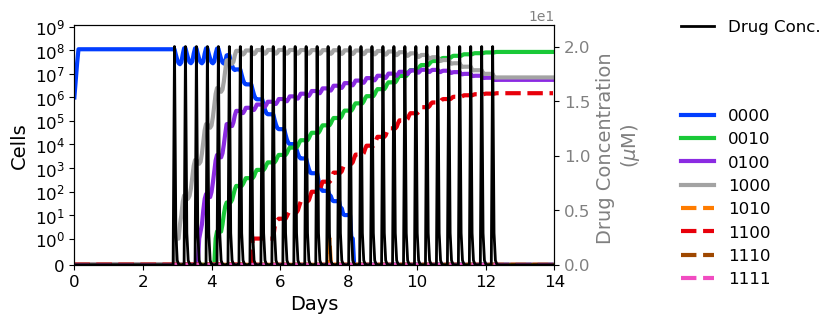

In [170]:
p.reset_drug_conc_curve(max_dose=100,k_elim=np.max(kelim),plot=True)
p.drug_curve = 20*(p.drug_curve/np.max(p.drug_curve))

for i in range(10):
    p.simulate()

In [171]:
params = np.zeros((len(cmax),len(kelim)))

for i,c in enumerate(cmax):
    for j,k in enumerate(kelim):
        p.reset_drug_conc_curve(max_dose=c,k_elim=k,plot=False)
        p.drug_curve = c*(p.drug_curve/np.max(p.drug_curve))
        # for n in range(100):
            # counts,et = p.simulate()
            # if np.sum(counts,axis=1)[-1] > 1:
                # res[i,j] += 1
        params[i,j] = c

print(params)

[[30.  30.  30.  30.  30. ]
 [35.5 35.5 35.5 35.5 35.5]
 [41.  41.  41.  41.  41. ]
 [46.5 46.5 46.5 46.5 46.5]
 [52.  52.  52.  52.  52. ]]
